# FINAL PROJECT: NETFLIX ~something~


# Index

[Netflix Titles csv](#Netflix-titles)

[Netflix TV Shows csv](#Netflix-TV-Shows)

[Movies Various Platforms](#Movies-on-platforms)

## Main Idea

Create a Tabletop/Boardgame recommender that asks users a videogame they like.

Clustering VG and adding TTBG to the grouping. 

Not based just in theme/genre i.e Horror, Resource Management, Strategy, etc



### First problem to tackle

## Imports


In [56]:
!pip install nltk

In [431]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re
from wordcloud import WordCloud

import streamlit as st

In [432]:
streamlit run my_app.py

SyntaxError: invalid syntax (<ipython-input-432-72726f56bf70>, line 1)

## CSVs

In [58]:
tv_shows = pd.read_csv("../data/tv_shows.csv")

netflix_titles = pd.read_csv("../data/netflix_titles.csv")

movies_plat = pd.read_csv("../data/MoviesOnStreamingPlatforms_updated.csv")

### Netflix titles

In [59]:
netflix_titles

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [60]:
netflix_titles["type"].unique()

array(['TV Show', 'Movie'], dtype=object)

In [61]:
netflix_titles["type"].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [62]:
# Separating teflix_titles DF into tv show or movie

titles_net_film = netflix_titles[netflix_titles["type"] == "Movie"]

titles_net_show = netflix_titles[netflix_titles["type"] == "TV Show"]

titles_net_film

titles_net_show

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7767,s7768,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
7775,s7776,TV Show,Zoids Wild,NaN,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,"August 14, 2020",2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7779,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...


### Netflix TV Shows

In [63]:
tv_shows[tv_shows["Netflix"] == 1]

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1926,1926,The Golden Path,2012,NaN,NaN,NaN,1,0,0,0,1
1927,1927,JingleKids,2019,NaN,NaN,NaN,1,0,0,0,1
1928,1928,Sin Ellas No Hay Paraíso,2013,NaN,NaN,NaN,1,0,0,0,1
1929,1929,Slice of Paradise,2017,NaN,NaN,NaN,1,0,0,0,1


### Movies on platforms

In [64]:
len(movies_plat)

16744

In [65]:
(len(movies_plat["IMDb"]) - movies_plat["IMDb"].isna().sum()) / 100

161.73

In [66]:
net_movies_plat = movies_plat[movies_plat["Netflix"] == 1]

### Cleaning NaNs titles_net_show

In [67]:
titles_net_show.isna().sum()


titles_net_show[titles_net_show["cast"].isna()].sample(5)

titles_net_show[titles_net_show["title"].str.contains("Cosmos")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [68]:
titles_net_show.isna().sum()

show_id            0
type               0
title              0
director        2226
cast             292
country          277
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

In [69]:
titles_net_show["country"] = titles_net_show["country"].fillna("Unknown / VV DD")

<ipython-input-69-bee9874e4d6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles_net_show["country"] = titles_net_show["country"].fillna("Unknown / VV DD")


In [70]:
titles_net_show[titles_net_show["rating"].isna()].sample(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2359,s2360,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."


In [71]:
# Clean 2 ratings that have NAN 

drop_list = [2359,3660]

titles_net_show.drop(drop_list, inplace = True)

C:\Users\Emanuele\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [72]:
# Cleaning the rest of NANs in columns - Filling NANs
titles_net_show["director"] = titles_net_show["director"].fillna("Unknown / VV DD")

titles_net_show["cast"] = titles_net_show["cast"].fillna("Anchors / Participants")

titles_net_show["country"] = titles_net_show["country"].fillna("Unknown")

titles_net_show["date_added"] = titles_net_show["date_added"].fillna("Misc")

titles_net_show.head()




<ipython-input-72-654e10a61192>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles_net_show["director"] = titles_net_show["director"].fillna("Unknown / VV DD")
<ipython-input-72-654e10a61192>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles_net_show["cast"] = titles_net_show["cast"].fillna("Anchors / Participants")
<ipython-input-72-654e10a61192>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown / VV DD,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,Unknown / VV DD,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,Anchors / Participants,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,Unknown / VV DD,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Unknown / VV DD,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


In [73]:
def find_show(search_title):
   
    checking_indf = titles_net_show["title"].str.find(search_title)

    index_search = np.where(checking_indf != -1)[0][0]

    show_found = titles_net_show.iloc[index_search]

    my_dict = dict(show_found)

    
    my_dict = { key:[value] for key, value in my_dict.items() }

    result = pd.DataFrame(my_dict)
    
    return result


find_show("pene")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s7556,TV Show,What in the World Happened?,Unknown / VV DD,"Eun-mi Go, Jaehyo, Eun-Hyung Jo, Ha-yeon Kim, ...",South Korea,"April 28, 2017",2015,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",A happy secret romance between a 40-year-old w...


### Cleaning NaNs titles_net_film

In [74]:
titles_net_film.isna().sum()

show_id           0
type              0
title             0
director        163
cast            426
country         230
date_added        0
release_year      0
rating            5
duration          0
listed_in         0
description       0
dtype: int64

In [75]:
titles_net_film[titles_net_film["rating"].isna()].sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
4323,s4324,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


In [76]:
titles_net_film["director"] = titles_net_film["director"].fillna("Unknown / VV DD")

titles_net_film["cast"] = titles_net_film["cast"].fillna("Anchors / Participants")

titles_net_film["country"] = titles_net_film["country"].fillna("Unknown")

titles_net_film["rating"] = titles_net_film["rating"].fillna("Unknown")

titles_net_film

<ipython-input-76-cf96b8f76828>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles_net_film["director"] = titles_net_film["director"].fillna("Unknown / VV DD")
<ipython-input-76-cf96b8f76828>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles_net_film["cast"] = titles_net_film["cast"].fillna("Anchors / Participants")
<ipython-input-76-cf96b8f76828>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,Unknown / VV DD,Nasty C,Unknown,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."


In [77]:
titles_net_film["listed_in"].unique()

genres = ["LGBTQ Movies", "Documentaries", "Children & Family Movies", "Comedies", "Horror Movies", "Sci-Fi & Fantasy", "Thrillers", "Dramas", "Romantic Movies", """"""""]

## Movies Netflix Data

In [78]:

def get_frequency_details(column):
    
    df_info = column.value_counts()

    my_info = dict(df_info)

    df_info_dict = { key:[value] for key, value in my_info.items() }

    print(f"This is the frequency of {column.name}")
    
    return df_info_dict


#### Dictionary with movie catalogue and when they where released. 

In [79]:
get_frequency_details(titles_net_film["release_year"])

This is the frequency of release_year


{2017: [744],
 2018: [734],
 2016: [642],
 2019: [582],
 2020: [411],
 2015: [382],
 2014: [244],
 2013: [202],
 2012: [158],
 2010: [136],
 2011: [127],
 2009: [103],
 2008: [102],
 2006: [72],
 2007: [72],
 2005: [61],
 2004: [50],
 2003: [40],
 2002: [39],
 2001: [32],
 2000: [30],
 1998: [27],
 1997: [26],
 1999: [26],
 1993: [18],
 1990: [17],
 1995: [17],
 1992: [16],
 1991: [16],
 1996: [16],
 1994: [15],
 1982: [15],
 1988: [14],
 1989: [12],
 2021: [12],
 1979: [10],
 1973: [10],
 1984: [9],
 1983: [9],
 1980: [9],
 1976: [9],
 1986: [8],
 1981: [8],
 1985: [8],
 1987: [7],
 1978: [6],
 1974: [6],
 1975: [6],
 1977: [6],
 1971: [5],
 1968: [4],
 1960: [4],
 1967: [4],
 1955: [3],
 1944: [3],
 1972: [3],
 1943: [3],
 1945: [3],
 1962: [3],
 1958: [3],
 1956: [2],
 1942: [2],
 1965: [2],
 1969: [2],
 1954: [2],
 1970: [2],
 1946: [1],
 1959: [1],
 1966: [1],
 1963: [1],
 1964: [1],
 1947: [1]}

#### Dictionary with movie age rating. 

In [80]:
get_frequency_details(titles_net_film["rating"])

This is the frequency of rating


{'TV-MA': [1845],
 'TV-14': [1272],
 'R': [663],
 'TV-PG': [505],
 'PG-13': [386],
 'PG': [247],
 'TV-Y': [117],
 'TV-G': [111],
 'TV-Y7': [95],
 'NR': [79],
 'G': [39],
 'Unknown': [5],
 'UR': [5],
 'TV-Y7-FV': [5],
 'NC-17': [3]}

#### Dict with movies per country

In [81]:
country_film_prod = get_frequency_details(titles_net_film["country"])

country_film_prod

This is the frequency of country


{'United States': [1850],
 'India': [852],
 'Unknown': [230],
 'United Kingdom': [193],
 'Canada': [118],
 'Spain': [89],
 'Egypt': [89],
 'Turkey': [73],
 'Philippines': [70],
 'France': [69],
 'Japan': [69],
 'Indonesia': [68],
 'Mexico': [65],
 'Nigeria': [62],
 'United Kingdom, United States': [52],
 'Hong Kong': [49],
 'Brazil': [46],
 'Germany': [42],
 'United States, Canada': [38],
 'Australia': [37],
 'South Korea': [36],
 'Thailand': [35],
 'Argentina': [34],
 'United States, United Kingdom': [30],
 'Canada, United States': [29],
 'Italy': [28],
 'France, Belgium': [24],
 'China': [21],
 'South Africa': [20],
 'Malaysia': [16],
 'Hong Kong, China': [16],
 'Poland': [15],
 'Pakistan': [14],
 'China, Hong Kong': [13],
 'United States, Germany': [12],
 'Netherlands': [12],
 'United Arab Emirates': [11],
 'Colombia': [11],
 'Chile': [11],
 'United States, France': [11],
 'United States, Australia': [11],
 'Taiwan': [10],
 'New Zealand': [9],
 'Germany, United States': [9],
 'Unite

## Tv Show Netflix Data

In [82]:
titles_net_show

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown / VV DD,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,Unknown / VV DD,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,Anchors / Participants,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,Unknown / VV DD,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Unknown / VV DD,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7767,s7768,TV Show,Zindagi Gulzar Hai,Unknown / VV DD,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
7775,s7776,TV Show,Zoids Wild,Unknown / VV DD,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,"August 14, 2020",2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...
7777,s7778,TV Show,Zombie Dumb,Unknown / VV DD,Anchors / Participants,Unknown / VV DD,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7779,s7780,TV Show,Zona Rosa,Unknown / VV DD,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...


In [83]:
titles_net_show.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [84]:
show_added_date = get_frequency_details(titles_net_show["date_added"])
show_added_date

This is the frequency of date_added


{'January 1, 2016': [24],
 'August 1, 2017': [22],
 'July 1, 2017': [19],
 'February 1, 2019': [17],
 'November 1, 2019': [16],
 'October 1, 2017': [15],
 'July 12, 2019': [15],
 'October 1, 2020': [14],
 'May 15, 2020': [14],
 'December 15, 2016': [14],
 'January 1, 2020': [13],
 'November 1, 2020': [13],
 'November 15, 2019': [13],
 'August 1, 2016': [12],
 'October 1, 2016': [12],
 'March 31, 2017': [12],
 'April 1, 2020': [11],
 'July 1, 2019': [11],
 'June 1, 2017': [11],
 'August 8, 2019': [11],
 'September 1, 2016': [11],
 'December 1, 2020': [11],
 'October 1, 2019': [10],
 'September 1, 2017': [10],
 'March 20, 2020': [10],
 'December 1, 2017': [10],
 'September 1, 2020': [10],
 'March 1, 2017': [10],
 'October 2, 2019': [10],
 'June 21, 2019': [10],
 'Misc': [10],
 'August 1, 2020': [9],
 'December 31, 2019': [9],
 'October 18, 2019': [9],
 'May 1, 2018': [9],
 'April 1, 2017': [9],
 'April 1, 2019': [9],
 'May 8, 2019': [9],
 'October 25, 2019': [9],
 'December 1, 2016': [8]

In [85]:
shows_age_rating = get_frequency_details(titles_net_show["rating"])

shows_age_rating

This is the frequency of rating


{'TV-MA': [1018],
 'TV-14': [659],
 'TV-PG': [301],
 'TV-Y7': [176],
 'TV-Y': [163],
 'TV-G': [83],
 'NR': [5],
 'R': [2],
 'TV-Y7-FV': [1]}

In [86]:
get_frequency_details(titles_net_show["country"])

This is the frequency of country


{'United States': [705],
 'Unknown / VV DD': [277],
 'United Kingdom': [204],
 'Japan': [156],
 'South Korea': [147],
 'India': [71],
 'Taiwan': [68],
 'Canada': [59],
 'France': [46],
 'Spain': [45],
 'Australia': [45],
 'China': [36],
 'Mexico': [35],
 'Turkey': [27],
 'Brazil': [26],
 'United States, Canada': [22],
 'Thailand': [22],
 'Colombia': [20],
 'Germany': [19],
 'Singapore': [17],
 'Argentina': [16],
 'Russia': [15],
 'Canada, United States': [13],
 'Egypt': [12],
 'Italy': [12],
 'United Kingdom, United States': [12],
 'United States, Japan': [9],
 'Denmark': [8],
 'Nigeria': [8],
 'Belgium': [7],
 'Sweden': [7],
 'United States, United Kingdom': [7],
 'Israel': [7],
 'Mexico, United States': [7],
 'Lebanon': [6],
 'Malaysia': [6],
 'South Africa': [5],
 'Norway': [5],
 'Poland': [5],
 'United States, France, Japan': [5],
 'Netherlands': [4],
 'Ireland': [4],
 'Pakistan': [4],
 'France, Belgium': [3],
 'United States, Czech Republic': [3],
 'Hong Kong': [3],
 'Japan, Unite

In [87]:
not_order_release_freq_show = get_frequency_details(titles_net_show["release_year"])

not_order_release_freq_show

This is the frequency of release_year


{2020: [457],
 2019: [414],
 2018: [387],
 2017: [268],
 2016: [240],
 2015: [158],
 2014: [90],
 2013: [64],
 2012: [61],
 2011: [39],
 2010: [37],
 2009: [34],
 2008: [23],
 2021: [19],
 2006: [13],
 2007: [13],
 2005: [12],
 2004: [9],
 2003: [9],
 1999: [7],
 2002: [6],
 1997: [4],
 2001: [4],
 1993: [4],
 1998: [4],
 2000: [4],
 1990: [3],
 1996: [3],
 1986: [2],
 1992: [2],
 1995: [2],
 1988: [2],
 1946: [1],
 1991: [1],
 1989: [1],
 1985: [1],
 1981: [1],
 1979: [1],
 1977: [1],
 1967: [1],
 1968: [1],
 1925: [1],
 1994: [1],
 1974: [1],
 1972: [1],
 1963: [1]}

In [88]:
from collections import OrderedDict
 

Ord_release_year = OrderedDict(sorted(not_order_release_freq_show.items()))
Ord_release_year

OrderedDict([(1925, [1]),
             (1946, [1]),
             (1963, [1]),
             (1967, [1]),
             (1968, [1]),
             (1972, [1]),
             (1974, [1]),
             (1977, [1]),
             (1979, [1]),
             (1981, [1]),
             (1985, [1]),
             (1986, [2]),
             (1988, [2]),
             (1989, [1]),
             (1990, [3]),
             (1991, [1]),
             (1992, [2]),
             (1993, [4]),
             (1994, [1]),
             (1995, [2]),
             (1996, [3]),
             (1997, [4]),
             (1998, [4]),
             (1999, [7]),
             (2000, [4]),
             (2001, [4]),
             (2002, [6]),
             (2003, [9]),
             (2004, [9]),
             (2005, [12]),
             (2006, [13]),
             (2007, [13]),
             (2008, [23]),
             (2009, [34]),
             (2010, [37]),
             (2011, [39]),
             (2012, [61]),
             (2013, [64]),
   

In [89]:

Ord_show_added = OrderedDict(sorted(show_added_date.items()))
Ord_show_added



OrderedDict([(' April 15, 2018', [1]),
             (' April 16, 2019', [1]),
             (' April 17, 2016', [1]),
             (' April 20, 2017', [1]),
             (' April 4, 2017', [1]),
             (' August 1, 2017', [1]),
             (' August 13, 2018', [1]),
             (' August 21, 2017', [1]),
             (' August 4, 2017', [3]),
             (' December 1, 2018', [1]),
             (' December 1, 2019', [2]),
             (' December 14, 2018', [2]),
             (' December 15, 2015', [1]),
             (' December 15, 2017', [2]),
             (' December 15, 2018', [1]),
             (' December 18, 2014', [1]),
             (' December 2, 2017', [1]),
             (' December 23, 2018', [1]),
             (' December 25, 2015', [1]),
             (' December 28, 2016', [1]),
             (' December 3, 2019', [1]),
             (' December 31, 2015', [1]),
             (' February 1, 2015', [1]),
             (' February 1, 2017', [1]),
             (' February

## Film Netflix Data

In [90]:
titles_net_film.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [91]:
film_added_date = get_frequency_details(titles_net_film["date_added"])
film_added_date

This is the frequency of date_added


{'January 1, 2020': [105],
 'November 1, 2019': [78],
 'March 1, 2018': [72],
 'December 31, 2019': [67],
 'October 1, 2018': [65],
 'November 1, 2018': [55],
 'October 1, 2019': [53],
 'January 1, 2018': [48],
 'July 1, 2019': [47],
 'January 1, 2021': [45],
 'July 1, 2018': [39],
 'April 1, 2018': [38],
 'January 1, 2019': [36],
 'March 10, 2017': [35],
 'April 1, 2020': [35],
 'October 1, 2017': [34],
 'August 1, 2018': [34],
 'September 1, 2017': [34],
 'May 1, 2018': [33],
 'November 20, 2019': [29],
 'July 5, 2020': [28],
 'September 1, 2019': [28],
 'August 1, 2019': [27],
 'August 2, 2018': [25],
 'December 1, 2018': [25],
 'February 1, 2019': [24],
 'March 1, 2019': [24],
 'December 1, 2019': [24],
 'November 1, 2017': [24],
 'May 1, 2017': [24],
 'August 16, 2018': [22],
 'October 1, 2020': [22],
 'February 15, 2019': [22],
 'December 31, 2018': [22],
 'November 1, 2020': [21],
 'April 1, 2019': [21],
 'October 15, 2017': [21],
 'June 1, 2017': [21],
 'December 15, 2019': [21

In [92]:
film_country_prod = get_frequency_details(titles_net_film["country"])
film_country_prod

This is the frequency of country


{'United States': [1850],
 'India': [852],
 'Unknown': [230],
 'United Kingdom': [193],
 'Canada': [118],
 'Spain': [89],
 'Egypt': [89],
 'Turkey': [73],
 'Philippines': [70],
 'France': [69],
 'Japan': [69],
 'Indonesia': [68],
 'Mexico': [65],
 'Nigeria': [62],
 'United Kingdom, United States': [52],
 'Hong Kong': [49],
 'Brazil': [46],
 'Germany': [42],
 'United States, Canada': [38],
 'Australia': [37],
 'South Korea': [36],
 'Thailand': [35],
 'Argentina': [34],
 'United States, United Kingdom': [30],
 'Canada, United States': [29],
 'Italy': [28],
 'France, Belgium': [24],
 'China': [21],
 'South Africa': [20],
 'Malaysia': [16],
 'Hong Kong, China': [16],
 'Poland': [15],
 'Pakistan': [14],
 'China, Hong Kong': [13],
 'United States, Germany': [12],
 'Netherlands': [12],
 'United Arab Emirates': [11],
 'Colombia': [11],
 'Chile': [11],
 'United States, France': [11],
 'United States, Australia': [11],
 'Taiwan': [10],
 'New Zealand': [9],
 'Germany, United States': [9],
 'Unite

In [93]:
not_order_release_freq_film = get_frequency_details(titles_net_film["release_year"])

#not_order_release_freq_film

Ord_release_year_film = OrderedDict(sorted(not_order_release_freq_film.items()))
Ord_release_year_film


This is the frequency of release_year


OrderedDict([(1942, [2]),
             (1943, [3]),
             (1944, [3]),
             (1945, [3]),
             (1946, [1]),
             (1947, [1]),
             (1954, [2]),
             (1955, [3]),
             (1956, [2]),
             (1958, [3]),
             (1959, [1]),
             (1960, [4]),
             (1962, [3]),
             (1963, [1]),
             (1964, [1]),
             (1965, [2]),
             (1966, [1]),
             (1967, [4]),
             (1968, [4]),
             (1969, [2]),
             (1970, [2]),
             (1971, [5]),
             (1972, [3]),
             (1973, [10]),
             (1974, [6]),
             (1975, [6]),
             (1976, [9]),
             (1977, [6]),
             (1978, [6]),
             (1979, [10]),
             (1980, [9]),
             (1981, [8]),
             (1982, [15]),
             (1983, [9]),
             (1984, [9]),
             (1985, [8]),
             (1986, [8]),
             (1987, [7]),
         

In [94]:
film_age_rating = get_frequency_details(titles_net_film["rating"])
film_age_rating

This is the frequency of rating


{'TV-MA': [1845],
 'TV-14': [1272],
 'R': [663],
 'TV-PG': [505],
 'PG-13': [386],
 'PG': [247],
 'TV-Y': [117],
 'TV-G': [111],
 'TV-Y7': [95],
 'NR': [79],
 'G': [39],
 'Unknown': [5],
 'UR': [5],
 'TV-Y7-FV': [5],
 'NC-17': [3]}

In [95]:
def tylen(x):
    x1 = len(x)
    x2 = type(x)
    result = (x1, x2)
    
    return result

tylen(not_order_release_freq_show)
    

(46, dict)

## Graphs - TV Show

In [96]:
#sns.pairplot(shows_age_rating, hue='species', size=2.5);

In [97]:
shows_age_rating.items()

dict_items([('TV-MA', [1018]), ('TV-14', [659]), ('TV-PG', [301]), ('TV-Y7', [176]), ('TV-Y', [163]), ('TV-G', [83]), ('NR', [5]), ('R', [2]), ('TV-Y7-FV', [1])])

In [98]:
#keys = list(shows_age_rating.keys())

#vals = [float(shows_age_rating[k][0]) for k in keys]

#sns.barplot(x=keys, y=vals).set_title("Netflix shows by Age Rating");
#
#fig4, ax4 = plt.subplots(figsize = (12,8))

#ax4.set_title("Netflix shows by Age Rating", size='25', fontweight='bold')

#sns.barplot(x = keys,y = vals, ax = ax4);

In [99]:
#g =sns.barplot(x=keys, y=vals).set_title("Netflix shows by Age Rating");

#for keys, values in shows_age_rating.items():
#    g.text(shows_age_rating.nam,"eme", values, color='black', ha="center")

In [100]:
#plt.legend(labels=['legendEntry1', 'legendEntry2', 'legendEntry3'])

In [101]:
shows_age_rating.values()

dict_values([[1018], [659], [301], [176], [163], [83], [5], [2], [1]])

#### Barplot: Netflix TV Shows distributed by Age Rating

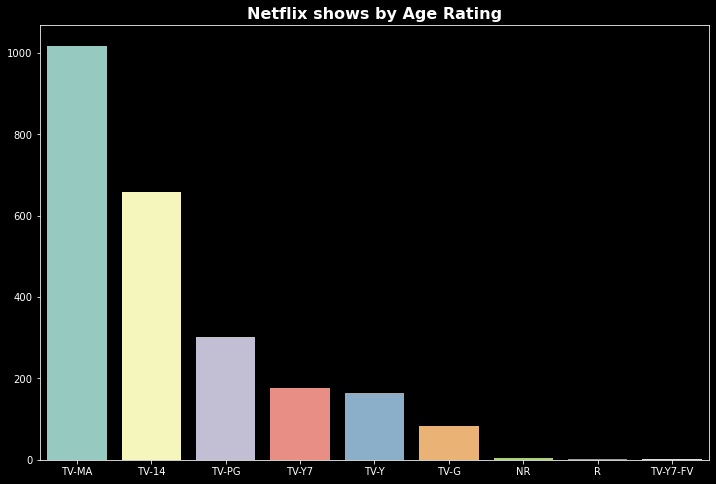

In [122]:
keys = list(shows_age_rating.keys())

vals = [float(shows_age_rating[k][0]) for k in keys]

fig4, ax4 = plt.subplots(figsize = (12,8))

ax4.set_title("Netflix shows by Age Rating", size='16', fontweight='bold') ### ci = None (para quitar barrita) ci = None

sns.barplot(x = keys,y = vals, ax = ax4);

#### Barplot: Netflix TV Shows added by release date

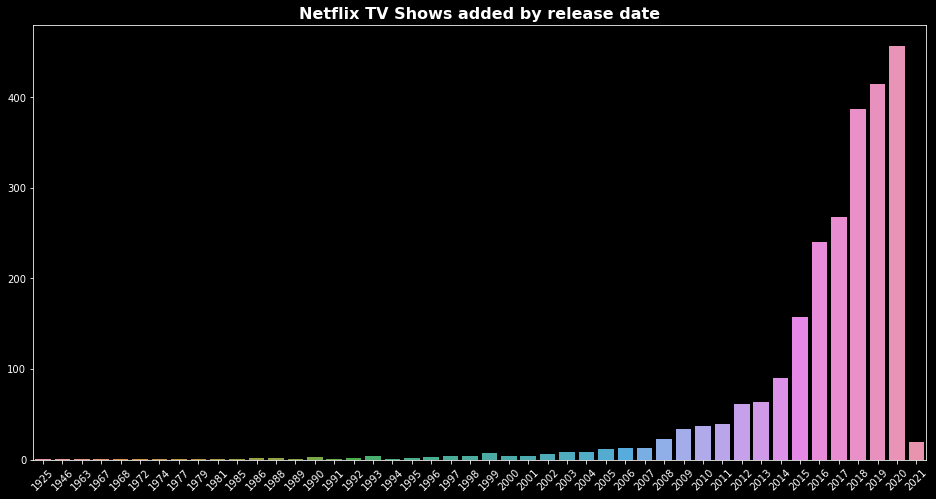

In [121]:
plt.style.use("dark_background")

keys = list(Ord_release_year.keys())

vals = [float(Ord_release_year[k][0]) for k in keys]

fig5, ax5 = plt.subplots(figsize = (16,8))

sns.barplot(x=keys, y=vals, ).set_title("Netflix TV Shows added by release date", size='16', fontweight='bold')

plt.xticks(rotation=45);

## Graphs - Movie

#### Barplot: Netflix Movies distributed by Age Rating

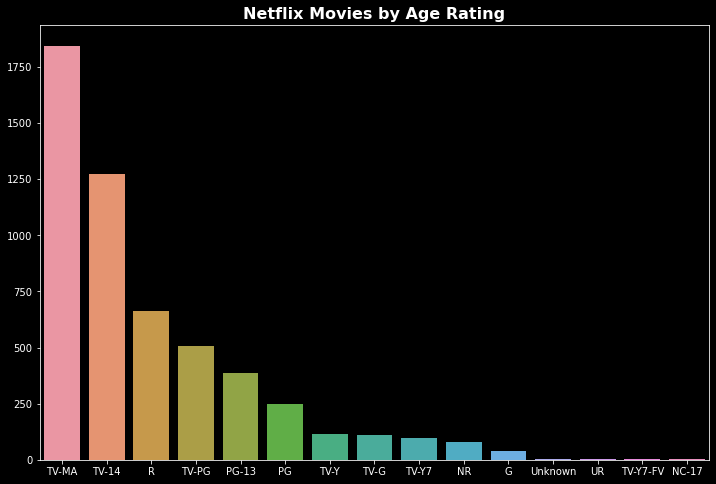

In [123]:
keys = list(film_age_rating.keys())

vals = [float(film_age_rating[k][0]) for k in keys]

fig6, ax6 = plt.subplots(figsize = (12,8))

ax6.set_title("Netflix Movies by Age Rating", size='16', fontweight='bold') ### ci = None (para quitar barrita) ci = None

sns.barplot(x = keys,y = vals, ax = ax6);


#### Barplot: Netflix TV Shows added by release date

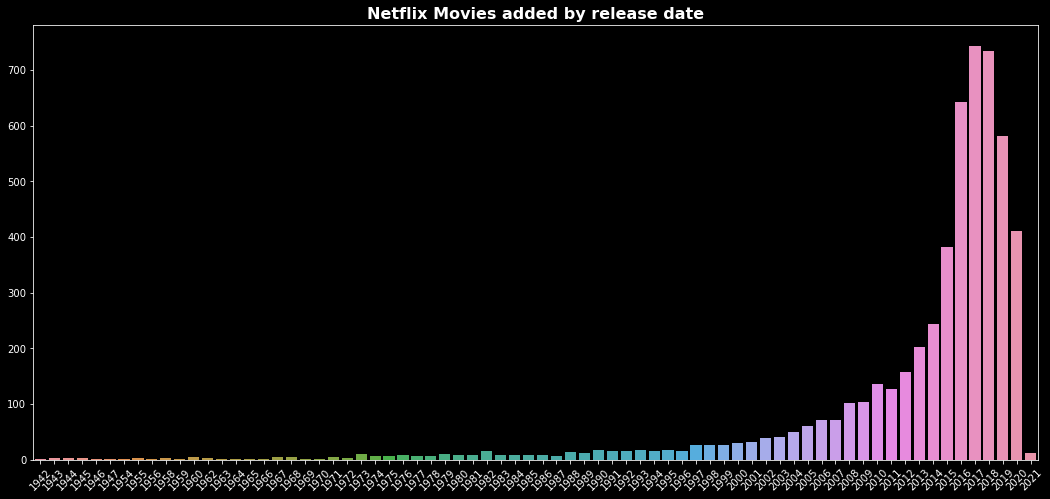

In [124]:
keys = list(Ord_release_year_film.keys())

vals = [float(Ord_release_year_film[k][0]) for k in keys]

fig5, ax5 = plt.subplots(figsize = (18,8))

sns.barplot(x=keys, y=vals, ).set_title("Netflix Movies added by release date", size='16', fontweight='bold')

plt.xticks(rotation=45);



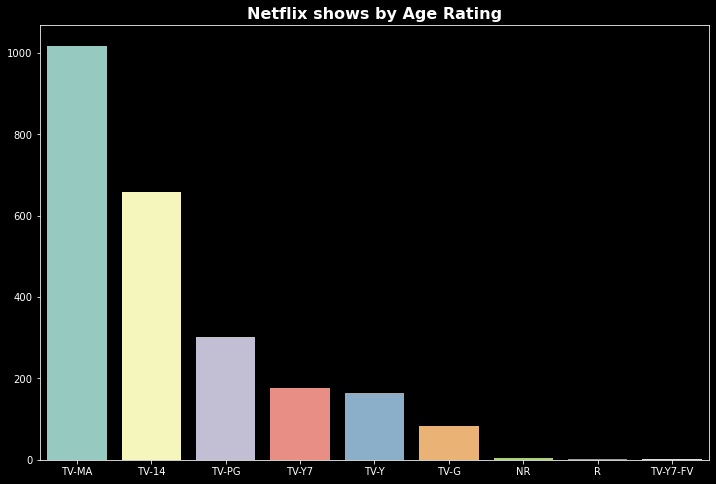

In [125]:
keys = list(shows_age_rating.keys())

vals = [float(shows_age_rating[k][0]) for k in keys]

fig4, ax4 = plt.subplots(figsize = (12,8))

ax4.set_title("Netflix shows by Age Rating", size='16', fontweight='bold') ### ci = None (para quitar barrita) ci = None

sns.barplot(x = keys,y = vals, ax = ax4);

### Bag of words & Cleaning

In [143]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('tagsets')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Emanuele\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Emanuele\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Emanuele\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Emanuele\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Emanuele\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [144]:
nltk.download('stopwords')
stop_words = list(stopwords.words('english')) 
#lista = stop_words
#lista.append("test")

#lista

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Emanuele\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Tokenizing words fro description

In [145]:
titles_net_show["description"]

0       In a future where the elite inhabit an island ...
5       A genetics professor experiments with a treatm...
11      In this dark alt-history thriller, a naïve law...
12      Archival video and new interviews examine Mexi...
16      As a psychology professor faces Alzheimer's, h...
                              ...                        
7767    Strong-willed, middle-class Kashaf and carefre...
7775    A quest for freedom and legendary treasure beg...
7777    While living alone in a spooky town, a young g...
7779    An assortment of talent takes the stage for a ...
7785    Dessert wizard Adriano Zumbo looks for the nex...
Name: description, Length: 2408, dtype: object

In [146]:
reviews = ''

for review in titles_net_show["description"]:
    reviews += review



corpus = nltk.sent_tokenize(reviews)

In [159]:
def create_corpus(data, column):
    """
    Input a data frame, and the a string of the name of the column you want to create the corpus
    It produces two outcomes:
    - the list_tokens as a list of tokens
    - the one_string_tokens as a string with all tokens
    """
 
    #create an empty string
    one_string_tokens = ''
    #we add every word in the 
    for review in data[column]:
        one_string_tokens += review
#     corpus = nltk.sent_tokenize(reviews)
    #list_tokens = word_tokenize(one_string_tokens)

    return one_string_tokens



In [161]:
corpus = create_corpus(titles_net_show, "description")

In [165]:
for i in range(len(corpus)):
    corpus[i] = corpus[i].lower()
    corpus[i] = re.sub(r'\W+',' ',corpus[i]) # Replace everything non-alpahnumeric by ' '
    corpus[i] = re.sub(r'\s+',' ',corpus[i]) # Replace one or more whitespaces by  ' '
    corpus[i] = re.sub(r'\d+',' ',corpus[i]) # Replace one or more digits by  ' '
    #corpus[i] = re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)'," ", corpus[i]) # Replace e-mails by ''
    # Replace urls by ''
    #corpus[i] = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', ' ' , corpus[i]) 
    # Replace html tags by ''
    corpus[i] = BeautifulSoup(corpus[i], 'lxml').get_text().strip()

TypeError: 'str' object does not support item assignment

In [166]:
corpus

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.A genetics professor experiments with a treatment for his comatose sister that blends medical and shamanic cures, but unlocks a shocking side effect.In this dark alt-history thriller, a naïve law student and a world-weary detective uncover a conspiracy that has tyrannized Poland for decades.Archival video and new interviews examine Mexican politics in 1994, a year marked by the rise of the EZLN and the assassination of Luis Donaldo Colosio.As a psychology professor faces Alzheimer\'s, his daughter and her three close female friends experience romance, marriage, heartbreak and tragedy.Seiya and the Knights of the Zodiac rise again to protect the reincarnation of the goddess Athena, but a dark prophecy hangs over them all.This docuseries takes a deep dive into the lucrative wellness industry, which touts health and healing. But do the products live up t

In [169]:
query = corpus
stopwords = ['what', 'who', 'is', 'a', 'at', 'is', 'he', "series", "one","two", "three", "four", "get", "take", "must"]
querywords = query.split()

resultwords  = [word for word in querywords if word.lower() not in stopwords]
result = ' '.join(resultwords)

print(result)

In future where the elite inhabit an island paradise far from the crowded slums, you chance to join the 3% saved from squalor.A genetics professor experiments with treatment for his comatose sister that blends medical and shamanic cures, but unlocks shocking side effect.In this dark alt-history thriller, naïve law student and world-weary detective uncover conspiracy that has tyrannized Poland for decades.Archival video and new interviews examine Mexican politics in 1994, year marked by the rise of the EZLN and the assassination of Luis Donaldo Colosio.As psychology professor faces Alzheimer's, his daughter and her close female friends experience romance, marriage, heartbreak and tragedy.Seiya and the Knights of the Zodiac rise again to protect the reincarnation of the goddess Athena, but dark prophecy hangs over them all.This docuseries takes deep dive into the lucrative wellness industry, which touts health and healing. But do the products live up to the promises?Kenya Barris and his 

In [149]:
wordfreq = {}
for sentence in corpus:
    words = sentence.split()
    #tokens = nltk.word_tokenize(sentence) # To get the words, it can be also done with sentence.split()
    for word in words:
        if ( word not in wordfreq.keys() ):
            wordfreq[word] = 1 # We initialize the corresponding counter
        else:
            wordfreq[word] += 1 # We increase the corresponding counter
    

In [150]:
wordfreq

{'in': 1233,
 'a': 2542,
 'future': 32,
 'where': 99,
 'the': 2401,
 'elite': 24,
 'inhabit': 1,
 'an': 437,
 'island': 22,
 'paradise': 3,
 'far': 17,
 'from': 354,
 'crowded': 1,
 'slums': 2,
 'you': 10,
 'get': 54,
 'one': 94,
 'chance': 36,
 'to': 1529,
 'join': 33,
 'saved': 4,
 'squalor': 1,
 'genetics': 1,
 'professor': 8,
 'experiments': 6,
 'with': 613,
 'treatment': 1,
 'for': 415,
 'his': 592,
 'comatose': 1,
 'sister': 21,
 'that': 219,
 'blends': 5,
 'medical': 16,
 'and': 2103,
 'shamanic': 1,
 'cures': 2,
 'but': 160,
 'unlocks': 2,
 'shocking': 11,
 'side': 14,
 'effect': 1,
 'this': 476,
 'dark': 49,
 'alt': 1,
 'history': 49,
 'thriller': 8,
 'naïve': 4,
 'law': 16,
 'student': 47,
 'world': 233,
 'weary': 1,
 'detective': 42,
 'uncover': 14,
 'conspiracy': 16,
 'has': 53,
 'tyrannized': 1,
 'poland': 2,
 'decades': 18,
 'archival': 4,
 'video': 13,
 'new': 203,
 'interviews': 21,
 'examine': 10,
 'mexican': 15,
 'politics': 12,
 'year': 60,
 'marked': 2,
 'by': 266,


In [151]:
from nltk.corpus import stopwords

stop_words = list(stopwords.words('english')) 


In [152]:
for i in range(len(stop_words)):
    stop_words[i] = re.sub(r"\s*'\s*\w*","",stop_words[i])

#stop_words = [word for word in list(np.unique(stop_words)) if len(word) > 1]


In [153]:
add_stop_words = ["one","two", "three", "four", "get", "take", "must"]

for words in add_stop_words:
    stop_words.append(words)
    
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'you',
 'you',
 'you',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more'

In [154]:
corpus = [(wordfreq[key],key) for key in list(wordfreq.keys()) if key not in stop_words]

In [155]:
corpus.sort(reverse = True)

# Here we keep only the 20 most frequent words but it can be changed to another bigger value
corpus_freq = [(word[1],word[0]) for word in corpus[:50]] 
corpus_freq = corpus_freq[1:]
corpus_freq

[('life', 246),
 ('world', 233),
 ('new', 203),
 ('family', 177),
 ('friends', 166),
 ('young', 162),
 ('love', 156),
 ('school', 126),
 ('high', 109),
 ('woman', 97),
 ('lives', 95),
 ('help', 89),
 ('group', 88),
 ('find', 80),
 ('years', 79),
 ('man', 78),
 ('show', 75),
 ('finds', 71),
 ('true', 70),
 ('old', 70),
 ('home', 70),
 ('city', 69),
 ('mysterious', 67),
 ('murder', 66),
 ('time', 65),
 ('team', 64),
 ('best', 64),
 ('adventures', 64),
 ('crime', 63),
 ('stories', 62),
 ('women', 61),
 ('back', 61),
 ('year', 60),
 ('death', 58),
 ('town', 56),
 ('evil', 56),
 ('fun', 55),
 ('five', 55),
 ('father', 55),
 ('comedy', 55),
 ('follows', 54),
 ('become', 54),
 ('past', 53),
 ('drama', 53),
 ('based', 53),
 ('war', 52),
 ('takes', 52),
 ('secret', 52),
 ('romance', 52)]

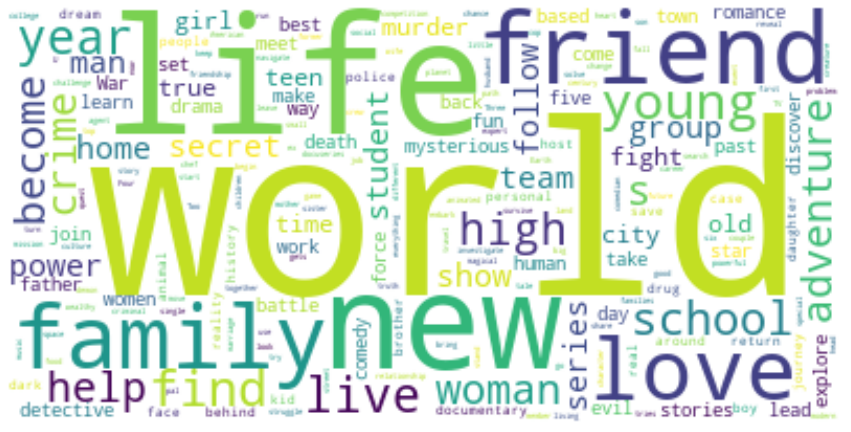

In [172]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(result)

ax = plt.figure(figsize=(15,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()
    

In [ ]:

wordcloud = WordCloud(width=900,height=500, max_words=50,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(corpus_freq)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



In [ ]:
efe = corpus

In [ ]:
for i in range(len(corpus)):
    corpus[i] = corpus[i].lower()
    corpus[i] = re.sub(r'\W+',' ',corpus[i]) # Replace everything non-alpahnumeric by ' '
    corpus[i] = re.sub(r'\s+',' ',corpus[i]) # Replace one or more whitespaces by  ' '
    #corpus[i] = re.sub(r'\d+',' ',corpus[i]) # Replace one or more digits by  ' '
    #corpus[i] = re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)'," ", corpus[i]) # Replace e-mails by ''
    # Replace urls by ''
    #corpus[i] = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', ' ' , corpus[i]) 
    # Replace html tags by ''
    corpus[i] = BeautifulSoup(corpus[i], 'lxml').get_text().strip()

In [ ]:
efe

#### importing

In [ ]:
add_stop_words = ["one","two", "three", "on", "is", "when", "and", "this", "they", "a", """""""""""""]

In [ ]:
def filter_review(x):
    text = efe
    tags = nltk.pos_tag(text)
    words = []
    for tag in tags:
        # Include the type of words that you want to consider.
        # It will be also better 
        if ( tag[1] in ['JJ','NN','VB'] ):
            words.extend(tag[0])
    return "".join(words)

filter_review(corpus)


In [ ]:
# API

import requests


import random
import pandas as pd
from bs4 import BeautifulSoup

#SELENIUM



In [ ]:
pip install twitchAPI

### Web Scraping for IMDB Recommendations


In [206]:

from selenium import webdriver

from time import sleep

from selenium.webdriver.common.keys import Keys

import time

In [178]:
url = "https://www.imdb.com/"
    
url

'https://www.imdb.com/'

In [180]:
user_choice = input("Please enter a Netflix media content you like:")

Please enter a Netflix media content you like:pene


In [ ]:
review_id_list= []
scores_over50_list= []
dates_list = []
titles_list=[]
reviews_list = []

for url in list_urls:
    options = webdriver.ChromeOptions()
    browser = webdriver.Chrome('Users/Emanuele/Desktop/IRONHACK/BOOTCAMPO/PROJECTS/FINAL PROJECT/data') 
    print("Current session is {}".format(browser.session_id))
    browser.get(url)
    time.sleep(3)
    browser.find_element_by_xpath("//*[@id='suggestion-search']").click()
    time.sleep(3)
    browser.find_element_by_xpath("//*[@id='main']/div/div[2]/table/tbody/tr[1]/td[2]/a").click()
    print(url)
    time.sleep(3)
    source = browser.page_source    
    soup = BeautifulSoup(source, features = "lxml")
    browser.close()
    for tag in soup.select("#taplc_location_reviews_list_resp_rr_resp_0 > div >div > div > div > div  "):
        if tag.get('data-reviewid') != None:
            review_id_list.append(tag.get('data-reviewid'))
        for date in tag.find_all(class_="ratingDate"):
            dates_list.append(date.get('title'))
        for title in tag.find_all(class_="noQuotes"):
            titles_list.append(title.text)
        for review in tag.find_all(class_="partial_entry"):
            reviews_list.append(review.text.replace("\n", ""))
        for score in tag.find_all("span",attrs={'class': re.compile('ui_bubble_rating bubble_')}):
            indiv_score= score.get('class')[1].split("_")[1]
            scores_over50_list.append(indiv_score)

In [191]:
options = webdriver.ChromeOptions()
browser = webdriver.Chrome('../data/chromedriver') 
#print("Current session is {}".format(browser.session_id))
browser.get(url)
time.sleep(3)
browser.find_element_by_xpath("//*[@id='suggestion-search']").click()
time.sleep(3)
browser.find_element_by_xpath("//*[@id='main']/div/div[2]/table/tbody/tr[1]/td[2]/a").click()
time.sleep(3)

In [ ]:
options = webdriver.ChromeOptions()
browser = webdriver.Chrome('Users/Emanuele/Desktop/IRONHACK/BOOTCAMPO/PROJECTS/FINAL PROJECT/data') 
print("Current session is {}".format(browser.session_id))
browser.get(url)
time.sleep(3)
browser.find_element_by_xpath("//*[@id='suggestion-search']").click()
time.sleep(3)
browser.find_element_by_xpath("//*[@id='main']/div/div[2]/table/tbody/tr[1]/td[2]/a").click()
print(url)
time.sleep(3)
source = browser.page_source    
soup = BeautifulSoup(source, features = "lxml")
browser.close()
for tag in soup.select("#taplc_location_reviews_list_resp_rr_resp_0 > div >div > div > div > div  "):
    if tag.get('data-reviewid') != None:
        review_id_list.append(tag.get('data-reviewid'))
    for date in tag.find_all(class_="ratingDate"):
        dates_list.append(date.get('title'))
    for title in tag.find_all(class_="noQuotes"):
        titles_list.append(title.text)
    for review in tag.find_all(class_="partial_entry"):
        reviews_list.append(review.text.replace("\n", ""))
    for score in tag.find_all("span",attrs={'class': re.compile('ui_bubble_rating bubble_')}):
        indiv_score= score.get('class')[1].split("_")[1]
        scores_over50_list.append(indiv_score)

In [ ]:
inputElement = browser.find_element_by_id("")
inputElement.send_keys('1234')

In [237]:
options = webdriver.ChromeOptions()
browser = webdriver.Chrome('../data/chromedriver') 

In [226]:
url = "https://www.imdb.com/"
    
url

'https://www.imdb.com/'

In [221]:
testinput = input("ejemplo:")


ejemplo:Breaking Bad


In [425]:
#search.clear()
options = webdriver.ChromeOptions()
browser = webdriver.Chrome('../data/chromedriver') 
browser.get(url)
search=browser.find_element_by_xpath("//*[@id='suggestion-search']")
search.send_keys(testinput)
search.send_keys(Keys.RETURN)
time.sleep(3)
browser.find_element_by_xpath("//*[@id='main']/div/div[2]/table/tbody/tr[1]/td[2]/a").click() #//*[@id="main"]/div/div[2]/table/tbody/tr[1]/td[2]/a
#print(browser.page_source)

source = browser.page_source    
soup = BeautifulSoup(source,"html.parser")

#print(type(soup))
#recomm_list = soup.find_all("div", {"class": "ipc-sub-grid ipc-sub-grid--page-span-2 ipc-sub-grid--nowrap ipc-shoveler__grid"})
recomm_list = soup.find_all("div", {"class", "ipc-poster-card ipc-poster-card--base ipc-poster-card--dynamic-width TitleCard-sc-1e5jqmp-0 egRGeD has-action-icons ipc-sub-grid-item ipc-sub-grid-item--span-2"})

#        print(sub)
#print(recomm_list)
#ratings = []
#titulos = []
recom_data = {"titles":[], "rating": [], "link": []}
for elem in recomm_list:
        # Getting rating
        rat = elem.find_all("span" , {"class", "ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb"})
        #ratings.append(rat[0].get_text())
        recom_data["rating"].append(rat[0].get_text())
        
        # Getting image
        img_recom = elem.find_all("div" , {"class", "ipc-media ipc-media--poster ipc-image-media-ratio--poster ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img"})
        text = "https" + str(img_recom[0]).split(", https")[-1]
        recom_data["link"].append(text.split()[0])
       
        # Get title
        tit = elem.find_all("span", attrs={"data-testid":"title"})
        rating_tag = elem.find_all("span", {"class" : "ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb"})
        if ( len(tit) > 0 ):
            for e in tit:
                	titulos.append(e.get_text())
                    
        recom_data["titles"].append(e.get_text())           
        #e = [s for s in sub if sub['data-testid']== "title"]
        #print(e)
        
        #recom_data["titles"].append(e.get_text())
        #t = (rat[0].get_text(),e.get_text())
        #datos.append(t)
             
pd.DataFrame(datos)

,titulo,rating,link


In [427]:
pd.DataFrame(recom_data)

,titles,rating,link
0,Juego de tronos,9.2,https://m.media-amazon.com/images/M/MV5BYTRiND...
1,Stranger Things,8.7,https://m.media-amazon.com/images/M/MV5BN2ZmYj...
2,Peaky Blinders,8.8,https://m.media-amazon.com/images/M/MV5BMTkzNj...
3,Better Call Saul,8.8,https://m.media-amazon.com/images/M/MV5BMGE4Yz...
4,Chernobyl,9.4,https://m.media-amazon.com/images/M/MV5BZGQ2Ym...
5,Los Soprano,9.2,https://m.media-amazon.com/images/M/MV5BZGJjYz...
6,The Walking Dead,8.2,https://m.media-amazon.com/images/M/MV5BMTc5Zm...
7,Friends,8.9,https://m.media-amazon.com/images/M/MV5BNDVkYj...
8,The Boys,8.7,https://m.media-amazon.com/images/M/MV5BNGEyOG...
9,El Camino: Una película de Breaking Bad,7.3,https://m.media-amazon.com/images/M/MV5BNjk4Mz...


In [423]:
test_df = {"link" : []}
for elem in recomm_list:
        # Getting rating
        img_recom = elem.find_all("div" , {"class", "ipc-media ipc-media--poster ipc-image-media-ratio--poster ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img"})
        text = "https" + str(img_recom[0]).split(", https")[-1]
        test_df["link"].append(text.split()[0])
        #print(img_recom)
        
pd.DataFrame(test_df)        

,link
0,https://m.media-amazon.com/images/M/MV5BYTRiND...
1,https://m.media-amazon.com/images/M/MV5BN2ZmYj...
2,https://m.media-amazon.com/images/M/MV5BMTkzNj...
3,https://m.media-amazon.com/images/M/MV5BMGE4Yz...
4,https://m.media-amazon.com/images/M/MV5BZGQ2Ym...
5,https://m.media-amazon.com/images/M/MV5BZGJjYz...
6,https://m.media-amazon.com/images/M/MV5BMTc5Zm...
7,https://m.media-amazon.com/images/M/MV5BNDVkYj...
8,https://m.media-amazon.com/images/M/MV5BNGEyOG...
9,https://m.media-amazon.com/images/M/MV5BNjk4Mz...


In [424]:
test_df

{'link': ['https://m.media-amazon.com/images/M/MV5BYTRiNDQwYzAtMzVlZS00NTI5LWJjYjUtMzkwNTUzMWMxZTllXkEyXkFqcGdeQXVyNDIzMzcwNjc@._V1_QL75_UY414_CR12,0,280,414_.jpg',
  'https://m.media-amazon.com/images/M/MV5BN2ZmYjg1YmItNWQ4OC00YWM0LWE0ZDktYThjOTZiZjhhN2Q2XkEyXkFqcGdeQXVyNjgxNTQ3Mjk@._V1_QL75_UX280_CR0,0,280,414_.jpg',
  'https://m.media-amazon.com/images/M/MV5BMTkzNjEzMDEzMF5BMl5BanBnXkFtZTgwMDI0MjE4MjE@._V1_QL75_UX280_CR0,0,280,414_.jpg',
  'https://m.media-amazon.com/images/M/MV5BMGE4YzY4NGEtOWYyYS00ZDk2LWExMmMtZDIyODhiMmNlMGE0XkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_QL75_UX280_CR0,3,280,414_.jpg',
  'https://m.media-amazon.com/images/M/MV5BZGQ2YmMxZmEtYjI5OS00NzlkLTlkNTEtYWMyMzkyMzc2MDU5XkEyXkFqcGdeQXVyMzQ2MDI5NjU@._V1_QL75_UX280_CR0,3,280,414_.jpg',
  'https://m.media-amazon.com/images/M/MV5BZGJjYzhjYTYtMDBjYy00OWU1LTg5OTYtNmYwOTZmZjE3ZDdhXkEyXkFqcGdeQXVyNTAyODkwOQ@@._V1_QL75_UY414_CR6,0,280,414_.jpg',
  'https://m.media-amazon.com/images/M/MV5BMTc5ZmM0OTQtNDY4MS00ZjMyLTgwYzgtOGY0Y2VlMWFm

In [419]:
test_df = {"link" : []}

for elem in recomm_list:
        # Getting rating
        img_recom = elem.find_all("div" , {"class", "ipc-media ipc-media--poster ipc-image-media-ratio--poster ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img"})
        text = "https" + str(img_recom[0]).split(", https")[-1]
        datos["titulo"].append(e.get_text())
        text.split()[0]
        #print([image_link.attrs["src"] for image_link in img_recom])
        
        pd.DataFrame(test_df)

KeyError: 'src'

In [382]:
 #efe = ["https://m.media-amazon.com/images/M/MV5BYTRiNDQwYzAtMzVlZS00NTI5LWJjYjUtMzkwNTUzMWMxZTllXkEyXkFqcGdeQXVyNDIzMzcwNjc@._V1_QL75_UY414_CR12,0,280,414_.jpg 280w" width="140"/></div>"]
href_tags = img_recom[0].find_all()
href_tags
for i in href_tags:
    #a = i.find_all(scr = True)
    print(i)
    
dir(href_tags)
href_tags.source

<img alt="Juego de tronos" class="ipc-image" loading="lazy" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" src="https://m.media-amazon.com/images/M/MV5BYTRiNDQwYzAtMzVlZS00NTI5LWJjYjUtMzkwNTUzMWMxZTllXkEyXkFqcGdeQXVyNDIzMzcwNjc@._V1_QL75_UY207_CR6,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYTRiNDQwYzAtMzVlZS00NTI5LWJjYjUtMzkwNTUzMWMxZTllXkEyXkFqcGdeQXVyNDIzMzcwNjc@._V1_QL75_UY207_CR6,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYTRiNDQwYzAtMzVlZS00NTI5LWJjYjUtMzkwNTUzMWMxZTllXkEyXkFqcGdeQXVyNDIzMzcwNjc@._V1_QL75_UY311_CR9,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYTRiNDQwYzAtMzVlZS00NTI5LWJjYjUtMzkwNTUzMWMxZTllXkEyXkFqcGdeQXVyNDIzMzcwNjc@._V1_QL75_UY414_CR12,0,280,414_.jpg 280w" width="140"/>
None|{}


In [422]:
#text = str(img_recom[0])
#new_text = "https" + text.split(", https")[-1]
#new_text.split()[0]
text = "https" + str(img_recom[0]).split(", https")[-1]
text.split()[0]

'https://m.media-amazon.com/images/M/MV5BZDhlMzY0ZGItZTcyNS00ZTAxLWIyMmYtZGQ2ODg5OWZiYmJkXkEyXkFqcGdeQXVyODkzNTgxMDg@._V1_QL75_UX280_CR0,0,280,414_.jpg'

In [280]:
image_list = []

for elem in recomm_list:
        # Getting rating
        img_recom = elem.find_all("span" , {"class", "ipc-media ipc-media--poster ipc-image-media-ratio--poster ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img"})
        #ratings.append(rat[0].get_text())
        print(img_recom)
        datos["rating"].append(rat[0].get_text())
        # Get title
        tit = elem.find_all("span", attrs={"data-testid":"title"})
        rating_tag = elem.find_all("span", {"class" : "ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb"})
        if ( len(tit) > 0 ):
            for e in tit:
                	titulos.append(e.get_text())
                    
        #e = [s for s in sub if sub['data-testid']== "title"]
        #print(e)
        datos["titulo"].append(e.get_text())
        #t = (rat[0].get_text(),e.get_text())
        #datos.append(t)
             
pd.DataFrame(datos)





[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


,titulo,rating
0,Juego de tronos,9.2
1,Stranger Things,8.7
2,Peaky Blinders,8.8
3,Better Call Saul,8.8
4,Chernobyl,9.4
5,Los Soprano,9.2
6,The Walking Dead,8.2
7,Friends,8.9
8,The Boys,8.7
9,El Camino: Una película de Breaking Bad,7.3


In [ ]:
class="ipc-media ipc-media--poster ipc-image-media-ratio--poster ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img"

In [197]:
 #div.ipc-sub-grid.ipc-sub-grid--page-span-2.ipc-sub-grid--nowrap.ipc-shoveler__grid

In [192]:
url = 'https://www.billboard.com/charts/hot-100'
page = requests.get(url)
page.status_code

NameError: name 'search_bar' is not defined

In [ ]:
<span data-testid="title">Stranger Things</span>

In [ ]:
#__next > main > div > section.ipc-page-background.ipc-page-background--base.TitlePage__StyledPageBackground-wzlr49-0.dDUGgO > div > section > div > div.TitleMainBelowTheFoldGroup__TitleMainPrimaryGroup-sc-1vpywau-1.btXiqv.ipc-page-grid__item.ipc-page-grid__item--span-2 > section:nth-child(23) > div.ipc-shoveler > div.ipc-sub-grid.ipc-sub-grid--page-span-2.ipc-sub-grid--nowrap.ipc-shoveler__grid > div:nth-child(1) > a > span

##### X-Path to click search bar & To click first result

In [ ]:
//*[@id="suggestion-search"]


//*[@id="main"]/div/div[2]/table/tbody/tr[1]/td[2]/a